In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from perlinnoise import *
from tqdm.notebook import tqdm as t
from scipy.interpolate import interp1d

In [2]:
#Ode integration version

In [3]:
def h(x):
    "0 <= x <= 1"
    return np.exp(-100*(x-0.5)**2)

def h_prime(x):
    return (100 - 200*x)*h(x)

In [4]:
x_0 = 0
dx = 1e-4
N = round(1/dx)
u_0 = 11
d_0 = 5
g = 9.8
print('fr_0 {0}'.format(np.sqrt(u_0**2/(g*d_0))))

fr_0 1.5714285714285714


In [5]:
def F(x, v, g=9.8):
    D, u = v
    RHS = -g*h_prime(x)
    LHS1 = (-u**2/(D+1e-10) + g)
    LHS2 = (u-D/(u+1e-10))
    return np.array([RHS/LHS1, RHS/LHS2])

In [6]:
noise = generate_perlin_noise_2d((100,100), (2,2))

In [7]:
noise = noise + abs(np.min(noise))

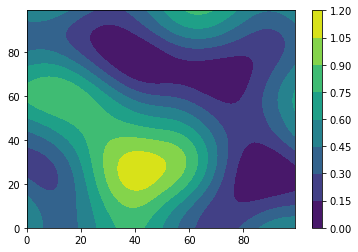

In [8]:
plt.contourf(noise + abs(np.min(noise)))
plt.colorbar()

In [11]:
vec = noise[80, :]

In [14]:
h = interp1d(x = np.linspace(0, 1, len(vec)), y= vec, bounds_error=False, fill_value = 0)
h_prime = interp1d(x = np.linspace(0, 1, len(vec)), y= np.gradient(vec), bounds_error=False, fill_value = 0)

In [88]:
def h(x):
    "0 <= x <= 1"
    return np.exp(-100*(x-0.5)**2)

def h_prime(x):
    return (100 - 200*x)*h(x)

In [89]:
def F(x, v, g=9.8, hp = h_prime):
    D, u = v
    RHS = -g*hp(x)
    LHS1 = (-u**2/(D+1e-10) + g)
    LHS2 = (u-D/(u+1e-10))
    return np.array([RHS/LHS1, RHS/LHS2])

In [101]:
u_0 = 1

In [102]:
for d_0 in [2]:
    res = solve_ivp(F, (0, 1), [d_0, u_0], method = 'DOP853', t_eval = np.arange(0, 1, 1e-3))
    Ds = res.y[0]
    us = res.y[1]

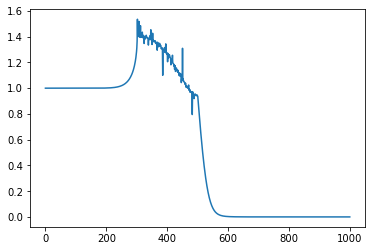

In [106]:
plt.plot(us)

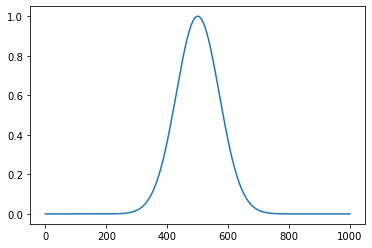

In [104]:
plt.plot(h(res.t))

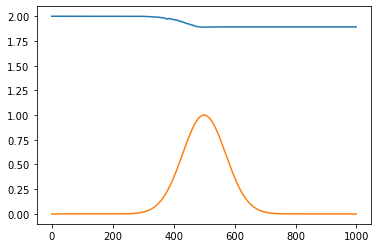

In [105]:
plt.plot(Ds+h(res.t))
plt.plot(h(res.t))

Plotting

In [80]:
data = []
for i in t(range(len(vec))):
    vec = noise[i, :]
    h = interp1d(x = np.linspace(0, 1, len(vec)), y= vec, bounds_error=False, fill_value = 0)
    h_prime = interp1d(x = np.linspace(0, 1, len(vec)), y= np.gradient(vec), bounds_error=False, fill_value = 0)
    def F(x, v, g=9.8):
        D, u = v
        RHS = -g*h_prime(x)
        LHS1 = (-u**2/(D+1e-10) + g)
        LHS2 = (u-D/(u+1e-10))
        return np.array([RHS/LHS1, RHS/LHS2])
    ress = []
    for d_0 in [1, 2, 3, 4, 5, 6]:
        res = solve_ivp(F, (0, 1), [d_0, u_0], method = 'DOP853', t_eval = np.arange(0, 1, 1e-3))
        Ds = res.y[0]
        us = res.y[1]
        ress.append(res)
    data.append(ress)

  0%|          | 0/100 [00:00<?, ?it/s]

In [52]:
def F(x, v, g=9.8):
    D, u = v
    RHS = -g*h_prime(x)
    LHS1 = (-u**2/(D+1e-10) + g)
    LHS2 = (u-D/(u+1e-10))
    return np.array([RHS/LHS1, RHS/LHS2])

In [53]:
plt.style.use('plot_style-coolwarm.txt')

In [73]:
str(3).zfill(3)

'003'

In [89]:
def plot(i):
    plt.xlim(0,1)
    plt.ylim(0,10)
    for j,d_0 in enumerate([1, 2, 3, 4, 5, 6]):
        res = data[i][j]
        Ds = res.y[0]
        us = res.y[1]
        vec = noise[i, :]
        h = interp1d(x = np.linspace(0, 1, len(vec)), y= vec, bounds_error=False, fill_value = 0)
        plt.scatter(res.t, Ds + h(res.t), s = 2, c = us)
    plt.colorbar()

    plt.plot(res.t, h(res.t), color = 'brown')
    plt.fill_between(np.arange(0, 1, 1e-3), y1 = [0]*1000, y2 = h(np.arange(0, 1, 1e-3)), color = (216/255,197/255,150/255))
    plt.savefig('frames/'+str(i).zfill(3)+'.png')
    plt.clf()

In [90]:
plot(20)

<Figure size 1800x1200 with 0 Axes>

In [88]:
[plot(i) for i in range(100)];

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<Figure size 1800x1200 with 0 Axes>

In [91]:
i = 50

In [110]:
x_0 = 0
dx = 1e-4
N = round(1/dx)
u_0 = 0.1
d_0 = 10
g = 9.8
print('fr_0 {0}'.format(np.sqrt(u_0**2/(g*d_0))))

fr_0 0.010101525445522109


In [111]:
vec = noise[i, :]
h = interp1d(x = np.linspace(0, 1, len(vec)), y= vec, bounds_error=False, fill_value = 0)
h_prime = interp1d(x = np.linspace(0, 1, len(vec)), y= np.gradient(vec), bounds_error=False, fill_value = 0)


In [112]:
def F(x, v, g=9.8, hp = h_prime):
    D, u = v
    RHS = -g*hp(x)
    LHS1 = (-u**2/(D+1e-10) + g)
    LHS2 = (u-D/(u+1e-10))
    return np.array([RHS/LHS1, RHS/LHS2])

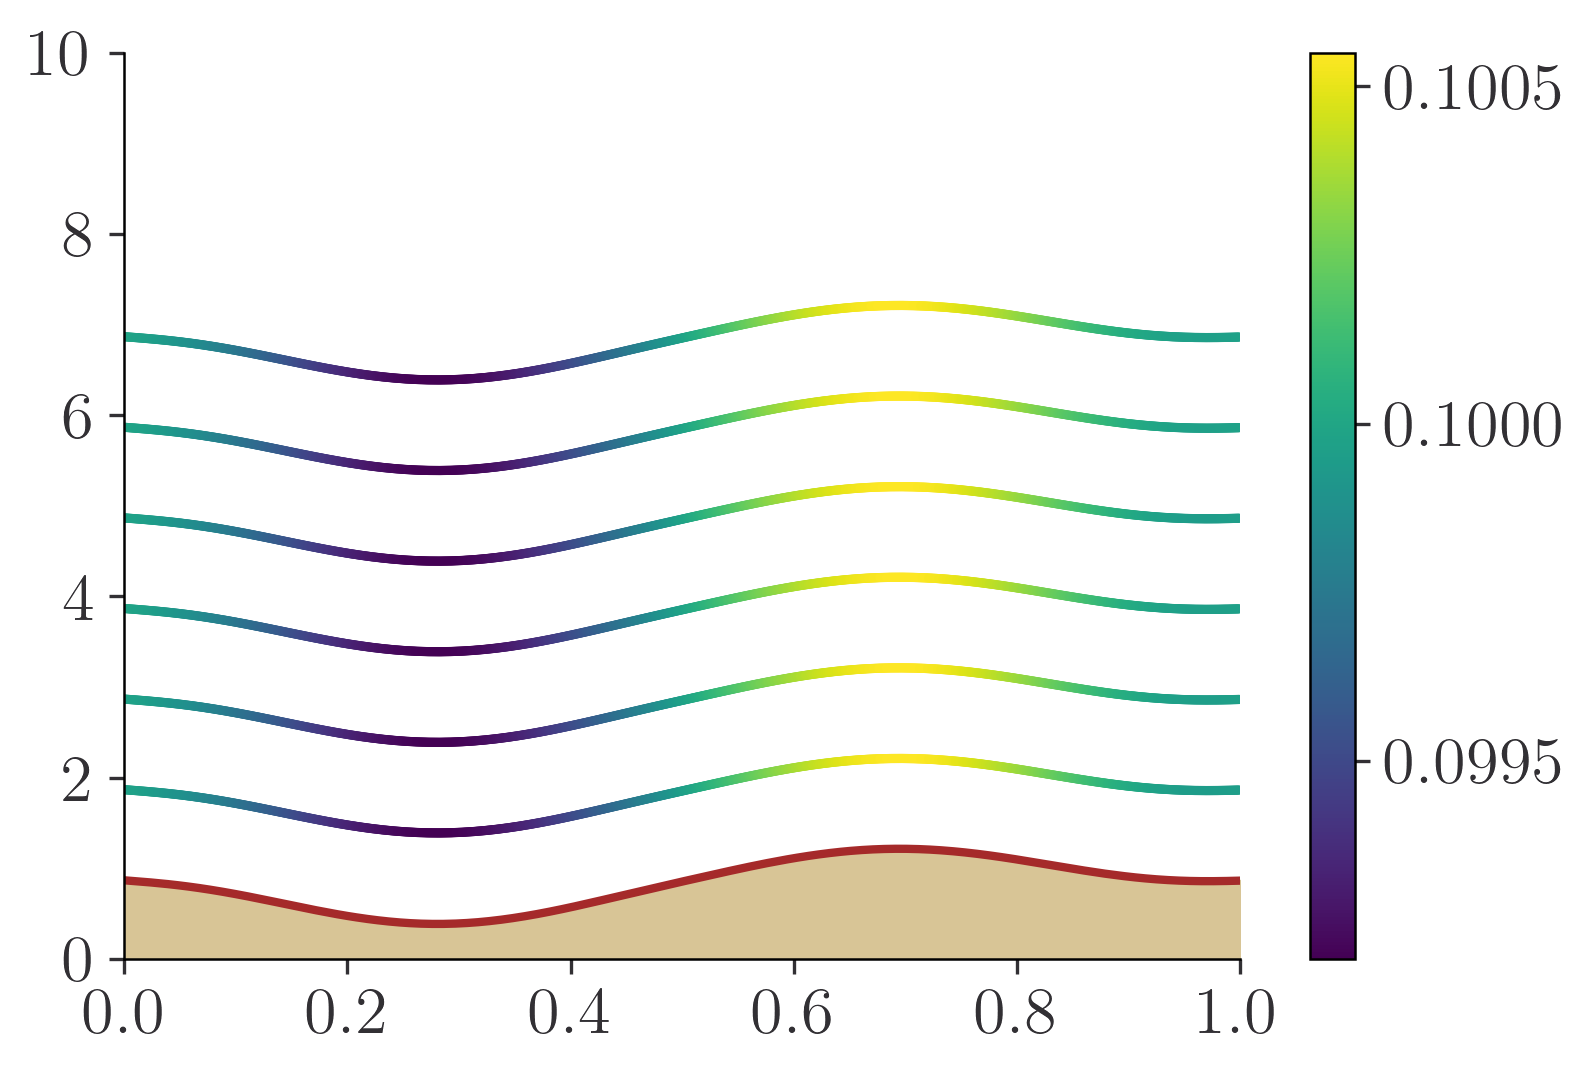

In [113]:
ress = []
for d_0 in [1, 2, 3, 4, 5, 6]:
    res = solve_ivp(F, (0, 1), [d_0, u_0], method = 'DOP853', t_eval = np.arange(0, 1, 1e-3))
    Ds = res.y[0]
    us = res.y[1]
    ress.append(res)
plt.xlim(0,1)
plt.ylim(0,10)
for j,d_0 in enumerate([1, 2, 3, 4, 5, 6]):
    res = ress[j]
    Ds = res.y[0]
    us = res.y[1]
    vec = noise[i, :]
    h = interp1d(x = np.linspace(0, 1, len(vec)), y= vec, bounds_error=False, fill_value = 0)
    plt.scatter(res.t, Ds + h(res.t), s = 2, c = us)
plt.colorbar()

plt.plot(res.t, h(res.t), color = 'brown')
plt.fill_between(np.arange(0, 1, 1e-3), y1 = [0]*1000, y2 = h(np.arange(0, 1, 1e-3)), color = (216/255,197/255,150/255))


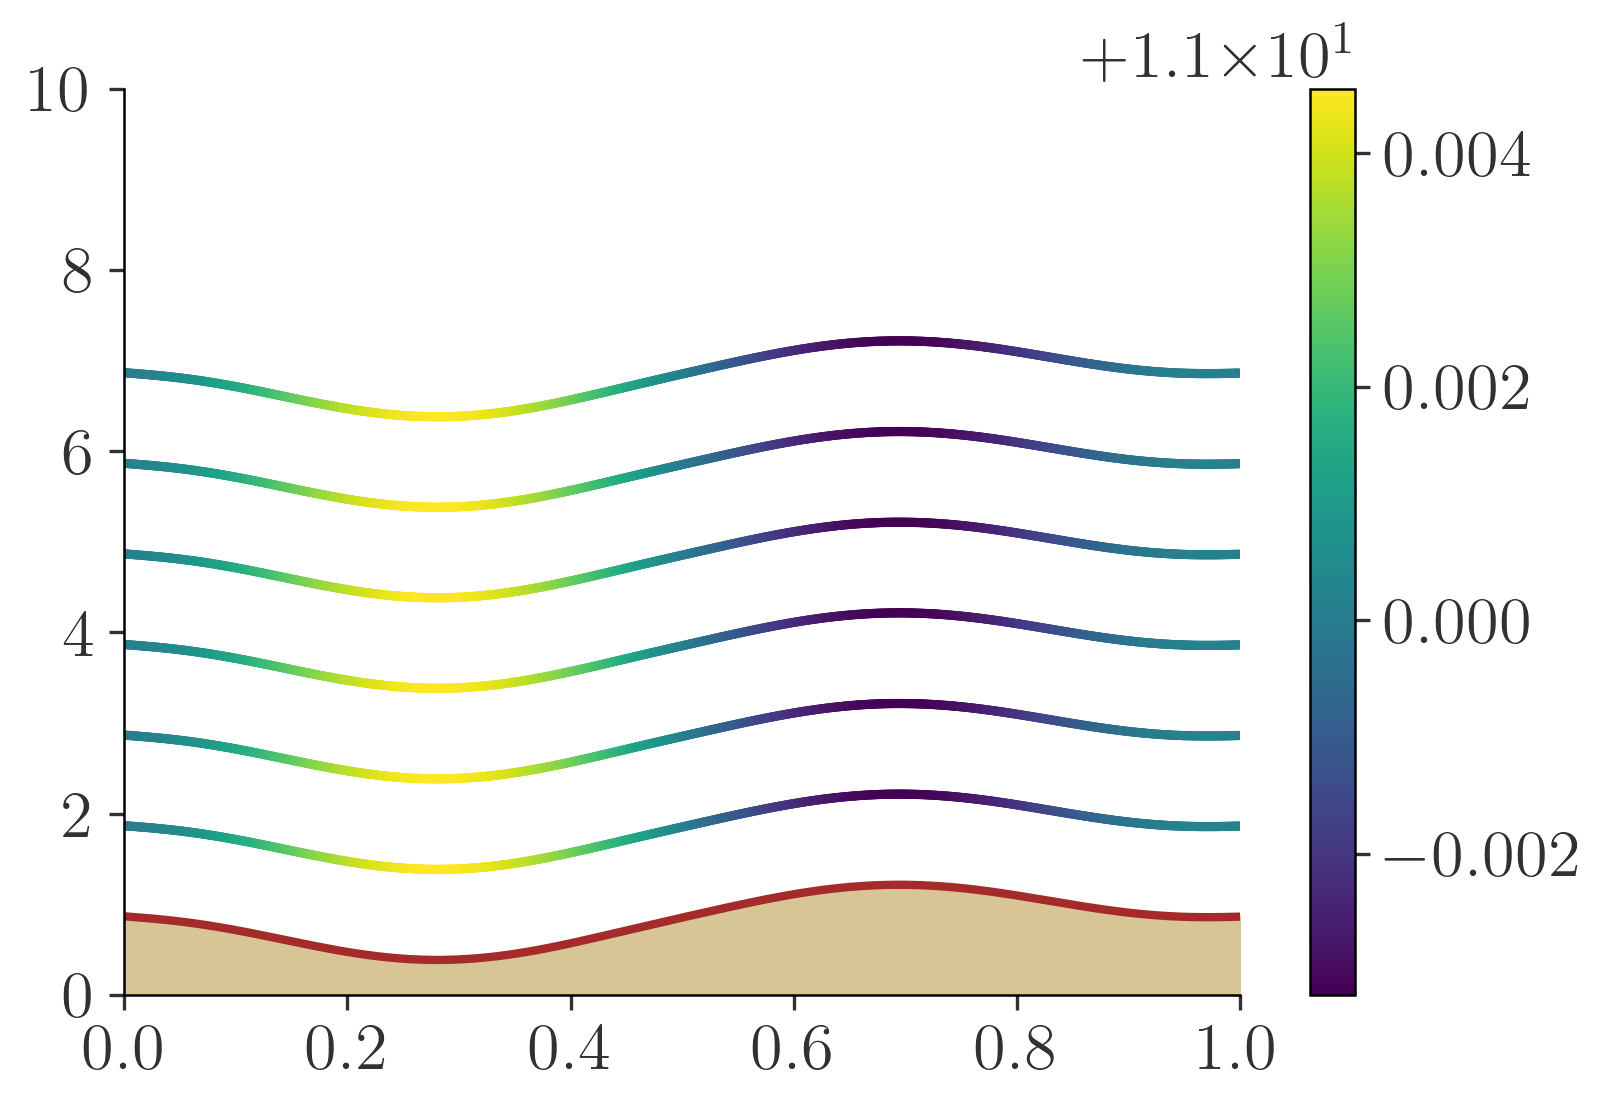

In [109]:
vec = noise[i, :]
h = interp1d(x = np.linspace(0, 1, len(vec)), y= vec, bounds_error=False, fill_value = 0)
h_prime = interp1d(x = np.linspace(0, 1, len(vec)), y= np.gradient(vec), bounds_error=False, fill_value = 0)
def F(x, v, g=9.8):
    D, u = v
    RHS = -g*h_prime(x)
    LHS1 = (-u**2/(D+1e-10) + g)
    LHS2 = (u-D/(u+1e-10))
    return np.array([RHS/LHS1, RHS/LHS2])
ress = []
for d_0 in [1, 2, 3, 4, 5, 6]:
    res = solve_ivp(F, (0, 1), [d_0, u_0], method = 'DOP853', t_eval = np.arange(0, 1, 1e-3))
    Ds = res.y[0]
    us = res.y[1]
    ress.append(res)
plt.xlim(0,1)
plt.ylim(0,10)
for j,d_0 in enumerate([1, 2, 3, 4, 5, 6]):
    res = data[i][j]
    Ds = res.y[0]
    us = res.y[1]
    vec = noise[i, :]
    h = interp1d(x = np.linspace(0, 1, len(vec)), y= vec, bounds_error=False, fill_value = 0)
    plt.scatter(res.t, Ds + h(res.t), s = 2, c = us)
plt.colorbar()

plt.plot(res.t, h(res.t), color = 'brown')
plt.fill_between(np.arange(0, 1, 1e-3), y1 = [0]*1000, y2 = h(np.arange(0, 1, 1e-3)), color = (216/255,197/255,150/255))
